In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from FieldCampaign import database as fdb

# Compare co-located lidar and sodar north of test site

In [2]:
startdate = pd.to_datetime('2019-11-01')
enddate = pd.to_datetime('2020-01-31')

compare sodar `sodar_{:d}m_wind_speed` [m/s], `sodar_{:d}m_wind_direction` [deg] with:

In [3]:
comparison_heights = {}
comparison_heights['lidar'] = [40,80,120] # lidar_ws_{:d} [m/s], lidar_wd_{:d}
comparison_heights['sonic'] = [50] # sonic_{:d}_ws [m/s], sonic_{:d}_wd [deg]
comparison_heights['cup'] = [40,60] # wind speed: met_ws_{:d}m_ms [m/s]
comparison_heights['vane'] = [38,56] # wind direction: met_corrwinddir_{:d}m [deg]

## get data from database and standardize

In [4]:
connect = fdb.Database()

INTIALIZE DATA BASE!!!
2019-11-15 00:00:00
2020-08-19 00:00:00
DATABASE INITIALIZED WITH START AND STOP TIME 2019-11-15 00:00:00 2020-08-19 00:00:00


In [5]:
%time df_hist = connect.get_data_from_db_1min(startdate,enddate)

# CPU times: user 40 s, sys: 13.8 s, total: 53.8 s
# Wall time: 2min 10s

CPU times: user 40 s, sys: 13.8 s, total: 53.8 s
Wall time: 2min 10s


In [6]:
df_hist['time'] = pd.to_datetime(df_hist['time'],format='%Y-%m-%d %H:%M:%S')
df_hist = df_hist.set_index('time')

In [7]:
sodar_wspd_cols = [col for col in df_hist.columns if col.startswith('sodar_') and col.endswith('_wind_speed') and not col.startswith('sodar_south')]
sodar_wdir_cols = [col for col in df_hist.columns if col.startswith('sodar_') and col.endswith('_wind_direction') and not col.startswith('sodar_south')]
lidar_wspd_cols = [col for col in df_hist.columns if col.startswith('lidar_ws_')]
lidar_wdir_cols = [col for col in df_hist.columns if col.startswith('lidar_wd_')]
sonic_wspd_cols = [col for col in df_hist.columns if col.startswith('sonic_') and col.endswith('_ws')]
sonic_wdir_cols = [col for col in df_hist.columns if col.startswith('sonic_') and col.endswith('_wd')]
cup_wspd_cols = [col for col in df_hist.columns if col.startswith('met_ws_')]
vane_wdir_cols = [col for col in df_hist.columns if col.startswith('met_corrwinddir_')]

In [8]:
data = {}

In [9]:
%%time
sodar = pd.DataFrame()
for wscol,wdcol in zip(sodar_wspd_cols,sodar_wdir_cols):
    print(wscol,wdcol)
    hgt = wscol.split('_')[1][:-1]
    assert hgt == wdcol.split('_')[1][:-1]
    tmp = pd.DataFrame()
    tmp['wspd'] = df_hist[wscol]
    tmp['wdir'] = df_hist[wdcol]
    tmp['height'] = float(hgt)
    sodar = pd.concat([sodar,tmp])
data['sodar'] = sodar.set_index('height',append=True)

sodar_30m_wind_speed sodar_30m_wind_direction
sodar_40m_wind_speed sodar_40m_wind_direction
sodar_50m_wind_speed sodar_50m_wind_direction
sodar_60m_wind_speed sodar_60m_wind_direction
sodar_80m_wind_speed sodar_80m_wind_direction
sodar_100m_wind_speed sodar_100m_wind_direction
sodar_120m_wind_speed sodar_120m_wind_direction
sodar_140m_wind_speed sodar_140m_wind_direction
sodar_160m_wind_speed sodar_160m_wind_direction
sodar_180m_wind_speed sodar_180m_wind_direction
sodar_200m_wind_speed sodar_200m_wind_direction
CPU times: user 5.35 s, sys: 376 ms, total: 5.72 s
Wall time: 5.79 s


In [10]:
lidar = pd.DataFrame()
for wscol,wdcol in zip(lidar_wspd_cols,lidar_wdir_cols):
    print(wscol,wdcol)
    hgt = wscol.split('_')[-1]
    assert hgt == wdcol.split('_')[-1]
    tmp = pd.DataFrame()
    tmp['wspd'] = df_hist[wscol]
    tmp['wdir'] = df_hist[wdcol]
    tmp['height'] = float(hgt)
    lidar = pd.concat([lidar,tmp])
data['lidar'] = lidar.set_index('height',append=True)

lidar_ws_40 lidar_wd_40
lidar_ws_60 lidar_wd_60
lidar_ws_80 lidar_wd_80
lidar_ws_100 lidar_wd_100
lidar_ws_120 lidar_wd_120
lidar_ws_140 lidar_wd_140
lidar_ws_160 lidar_wd_160
lidar_ws_180 lidar_wd_180


In [11]:
sonic = pd.DataFrame()
for wscol,wdcol in zip(sonic_wspd_cols,sonic_wdir_cols):
    print(wscol,wdcol)
    hgt = wscol.split('_')[1]
    assert hgt == wdcol.split('_')[1]
    tmp = pd.DataFrame()
    tmp['wspd'] = df_hist[wscol]
    tmp['wdir'] = df_hist[wdcol]
    tmp['height'] = float(hgt)
    sonic = pd.concat([sonic,tmp])
data['sonic'] = sonic.set_index('height',append=True)

sonic_50_ws sonic_50_wd
sonic_10_ws sonic_10_wd


In [12]:
cup = pd.DataFrame()
for wscol in cup_wspd_cols:
    print(wscol)
    hgt = wscol.split('_')[2][:-1]
    tmp = pd.DataFrame()
    tmp['wspd'] = df_hist[wscol]
    tmp['height'] = float(hgt)
    cup = pd.concat([cup,tmp])
data['cup'] = cup.set_index('height',append=True)

met_ws_60m_ms
met_ws_58m_ms
met_ws_40m_ms


In [13]:
vane = pd.DataFrame()
for wdcol in vane_wdir_cols:
    print(wdcol)
    hgt = wdcol.split('_')[2][:-1]
    tmp = pd.DataFrame()
    tmp['wdir'] = df_hist[wdcol]
    tmp['height'] = float(hgt)
    vane = pd.concat([vane,tmp])
data['vane'] = vane.set_index('height',append=True)

met_corrwinddir_56m
met_corrwinddir_38m


## make scatter plots

In [28]:
def scat(ax,qty,instrname,zinstr):
    # collect data
    y = data[instrname].xs(zinstr,level='height')[qty]
    if zinstr in data['sodar'].index.levels[1]:
        zsodar = zinstr
    else:
        zsodar = np.round(zinstr/10)*10
        assert zsodar in data['sodar'].index.levels[1]
    x = data['sodar'].xs(zsodar,level='height')[qty] 
    # scatterplot w/ ref line
    ax.scatter(x,y,alpha=0.01)
    xlim = ax.get_xlim()
    ax.plot(xlim,xlim,color=[0,1,0],lw=1)
    ax.set_xlim(xlim)
    ax.set_xlabel(f'sodar at {zsodar:.1f}m',fontsize='x-large')
    ax.set_ylabel(f'{instrname} at {zinstr:.1f}m',fontsize='x-large')
    ax.set_title(qty,fontsize='x-large')
    ax.grid()
    ax.axis('scaled')

### wind speed

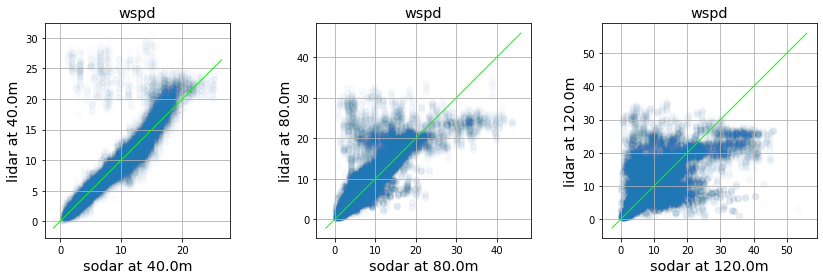

In [29]:
instrument = 'lidar'
Nheights = len(comparison_heights[instrument])
fig,ax = plt.subplots(ncols=Nheights,figsize=(Nheights*4,4))
if Nheights == 1: ax = [ax]
for axi,hgt in zip(ax,comparison_heights[instrument]):
    scat(axi,'wspd',instrument,hgt)
fig.tight_layout()

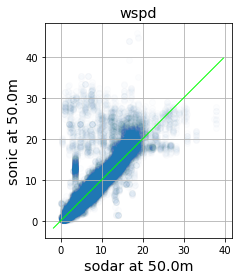

In [30]:
instrument = 'sonic'
Nheights = len(comparison_heights[instrument])
fig,ax = plt.subplots(ncols=Nheights,figsize=(Nheights*4,4))
if Nheights == 1: ax = [ax]
for axi,hgt in zip(ax,comparison_heights[instrument]):
    scat(axi,'wspd',instrument,hgt)
fig.tight_layout()

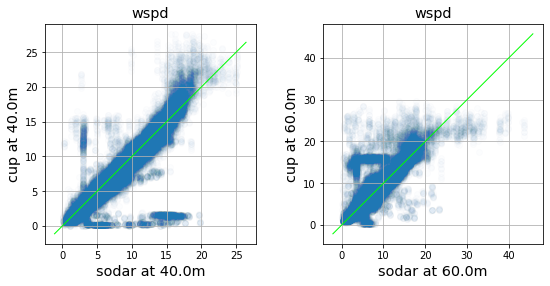

In [31]:
instrument = 'cup'
Nheights = len(comparison_heights[instrument])
fig,ax = plt.subplots(ncols=Nheights,figsize=(Nheights*4,4))
if Nheights == 1: ax = [ax]
for axi,hgt in zip(ax,comparison_heights[instrument]):
    scat(axi,'wspd',instrument,hgt)
fig.tight_layout()

### wind direction

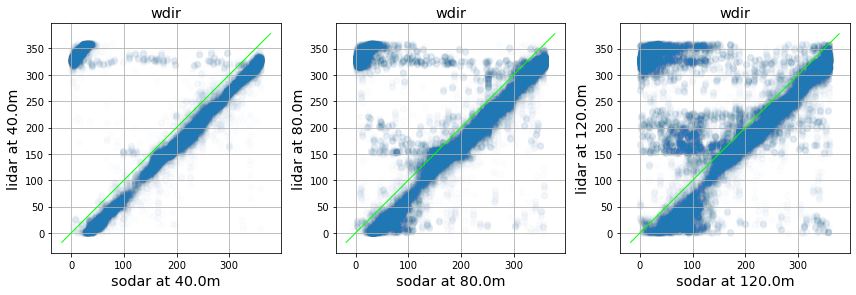

In [32]:
instrument = 'lidar'
Nheights = len(comparison_heights[instrument])
fig,ax = plt.subplots(ncols=Nheights,figsize=(Nheights*4,4))
if Nheights == 1: ax = [ax]
for axi,hgt in zip(ax,comparison_heights[instrument]):
    scat(axi,'wdir',instrument,hgt)
fig.tight_layout()

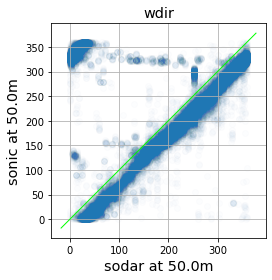

In [33]:
instrument = 'sonic'
Nheights = len(comparison_heights[instrument])
fig,ax = plt.subplots(ncols=Nheights,figsize=(Nheights*4,4))
if Nheights == 1: ax = [ax]
for axi,hgt in zip(ax,comparison_heights[instrument]):
    scat(axi,'wdir',instrument,hgt)
fig.tight_layout()

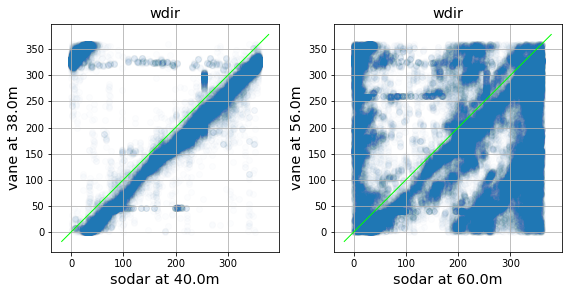

In [34]:
instrument = 'vane'
Nheights = len(comparison_heights[instrument])
fig,ax = plt.subplots(ncols=Nheights,figsize=(Nheights*4,4))
if Nheights == 1: ax = [ax]
for axi,hgt in zip(ax,comparison_heights[instrument]):
    scat(axi,'wdir',instrument,hgt)
fig.tight_layout()